# Funny figure of the qbits as a dumbbell from a gym.

Bumbbell has 2 circles and a handle that connects them.
The optimal ordering might be not trivial for a human brain

In [1]:
import pulser
import numpy as np
import example.helpers as helpers

import optimatrix

In [ ]:
def dumbbarrel_coords(L: int, rotate: float) -> np.ndarray:
    R = float(L)/np.pi
    dist = 5*R
    coords_ring1 = (
        np.array(
            [
                (R * np.cos(theta * 2 * np.pi / L), R * np.sin(theta * 2 * np.pi / L)) 
                for theta in range(L)
            ]
        )
    )

    coords_ring2 = (
        np.array(
            [
                (dist + R * np.cos(theta * 2 * np.pi / L), R * np.sin(theta * 2 * np.pi / L)) 
                for theta in range(L)
            ]
        )
    )

    step = R * 2 * np.pi / L  # distance between dots on the ring ~ R * delta(phi)
    link = np.array(
        [
            (t, 0) for t in np.arange(R + step, dist - R, step)
        ]
    )

    def rotate_theta(theta0, vector):
        rotation = np.array([
            [np.cos(theta0), -np.sin(theta0)],
            [np.sin(theta0),  np.cos(theta0)]
        ])
        return rotation @ vector
    
    coords = np.concatenate((coords_ring1, coords_ring2, link))

    rotated_coords = np.array([rotate_theta(rotate, coord) for coord in coords])

    return pulser.Register.from_coordinates(rotated_coords, center = True)


original_chain = dumbbarrel_coords(20, rotate = 1/(2 * np.pi))
#chain = helpers.shuffle_qubits(original_chain)
chain = original_chain


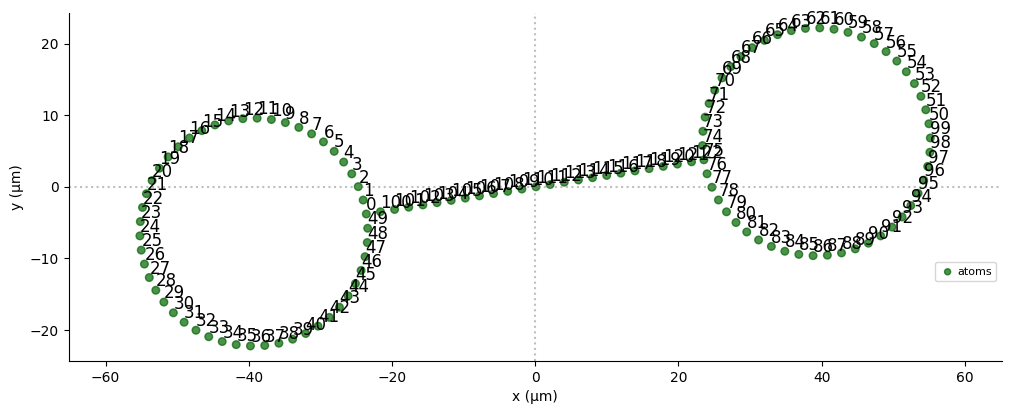

In [3]:
chain.draw()


optimal permutation is
 [50, 51, 99, 52, 98, 53, 97, 54, 96, 55, 95, 56, 94, 57, 93, 58, 92, 59, 91, 60, 90, 61, 89, 62, 88, 63, 87, 64, 86, 65, 85, 66, 84, 67, 83, 68, 82, 69, 81, 70, 80, 71, 79, 72, 78, 73, 77, 74, 76, 75, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 0, 1, 49, 2, 48, 3, 47, 4, 46, 5, 45, 6, 44, 7, 43, 8, 42, 9, 41, 10, 40, 11, 39, 12, 38, 13, 37, 14, 36, 15, 35, 16, 34, 17, 33, 18, 32, 19, 31, 20, 30, 21, 29, 22, 28, 23, 27, 24, 26, 25]


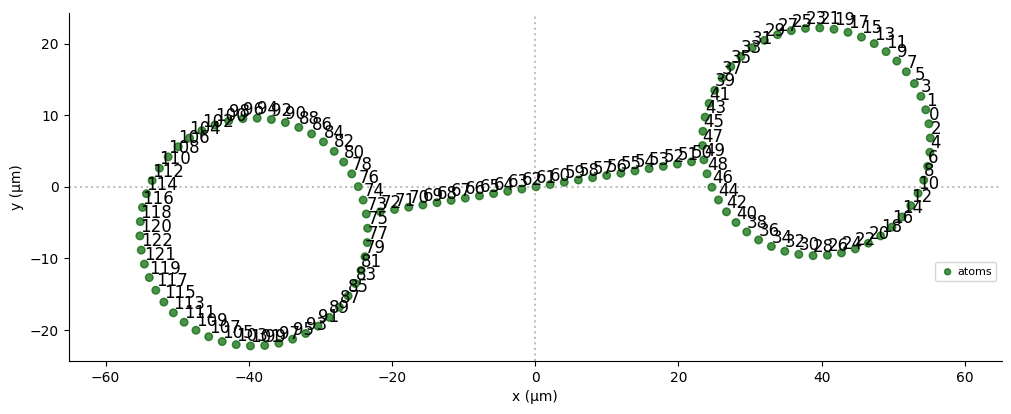

In [4]:
interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)
chain.draw()

optimal permutation is
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]


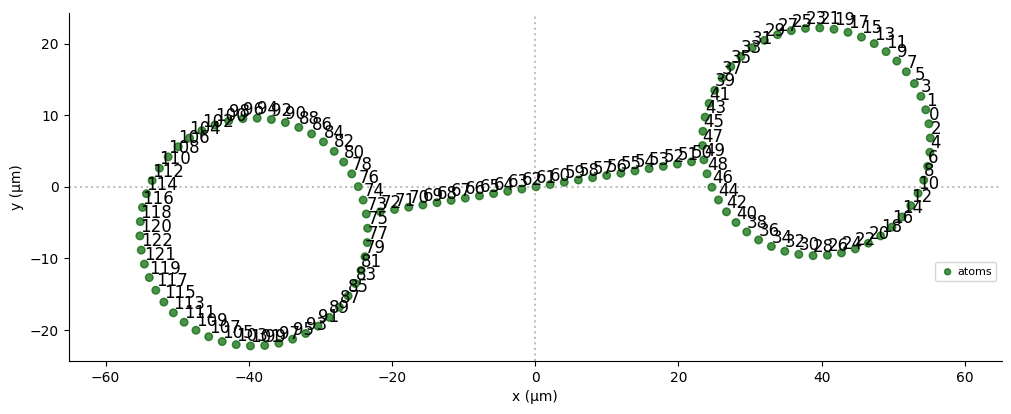

In [5]:
# Second round of optimisation 

interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()